# Prophet extension

In [18]:
from ipynb.fs.defs.prophet import generateDistribution, Finv
import pandas as pd
import numpy as np
from tqdm import tqdm # for the progress bar
from statistics import mean
import matplotlib.pyplot as plt
import dataframe_image as dfi
from scipy.stats import ttest_ind

#packages for storing results
import os
from datetime import datetime

In [36]:
def FairGeneralProphetExtended(q, V, distribution_type, epsilon):
    s = 0.0
    n = len(V)
    for i in range(0,n): #value < 1 reaches a drop!
        p = (1- (q[i]/2)/(epsilon-(s/2)))
        if V[i] >= Finv(distribution_type, p):
            return i
        s += q[i]

def FairIIDProphetExtended(V, distribution_type, epsilon):
    n = len(V)
    for i in range(0, n):
        p = 1 - (2/(3*n)) / (epsilon - 2*(i-1)/(3*n))
        if V[i] >= Finv(distribution_type, p):
                 return i
        
def runExperimentExtended(algorithm, N_experimentReps, distribution_type, n_candidates, epsilon):
    arrivalPositionsChosen, chosenValues, chosenValuesExcludeNone = [0]*n_candidates, [], []
    nones = 0
    for _ in tqdm(range(0, N_experimentReps)):
        q, Values = generateDistribution(distribution_type, n_candidates)
        
        if algorithm == "FairGeneralProphet":
                result = FairGeneralProphetExtended(q, Values, distribution_type, epsilon)
        elif algorithm == "FairIIDProphet":
                result = FairIIDProphetExtended(Values, distribution_type, epsilon)
        if result != None:
            arrivalPositionsChosen[result] += 1
            chosenValues.append(Values[result])
            chosenValuesExcludeNone.append(Values[result])
            
        if result == None: 
            chosenValues.append(0)
            nones += 1     
        
    noneRate = nones/N_experimentReps
        
    return noneRate, mean(chosenValues), mean(chosenValuesExcludeNone), arrivalPositionsChosen

def grid_search(algorithm, N_experimentReps, distribution_type,n_candidates, parameters,path):
    df = pd.DataFrame(columns=['epsilon', 'None rate', "Mean value (None=0)", "Mean value (excluding None)"])
    
    print(algorithm,distribution_type)
    for param in parameters:
        if algorithm == 'FairIIDProphet':
            param = np.round(param,1) # round epsilon in order to deal with float mistake in np.arange generation
        if algorithm == 'FairIIDProphet' and param in [0.6,0.8,1.1]:
            continue # For clarity in the plots, we epsilon values 0.6, 0.8, or 1.1 from the grid search results
        
        nonerate, avg_include, avg_exclude, chosen_positions = runExperimentExtended(algorithm=algorithm, 
                                                                                     N_experimentReps=N_experimentReps,
                                                                                     distribution_type=distribution_type, 
                                                                                     n_candidates=n_candidates, 
                                                                                     epsilon=param
                                                                                    )

        a_series = pd.Series([param,nonerate,avg_include,avg_exclude], index = df.columns)
        df = df.append(a_series, ignore_index=True)

        plt.plot(range(0,n_candidates), chosen_positions, label= str("ε = " + str(param)))
    plt.xlabel("Arrival position")
    plt.ylabel("Num Picked")
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                    mode="expand", borderaxespad=0, ncol=2)
    plt.tight_layout()
    plt.savefig(path+"/"+algorithm+'_'+distribution_type+".jpeg", dpi=500, bbox_inches='tight')
    dfi.export(df, path+'/'+algorithm+'_'+distribution_type+'_table.jpeg')
    plt.show()
    print(df)


## Running experiments

FairGeneralProphet uniform


100%|██████████████████████████████████| 50000/50000 [00:03<00:00, 14434.50it/s]
[0202/232551.847565:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0202/232551.850104:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[0202/232551.851380:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0202/232552.605703:INFO:headless_shell.cc(653)] Written to file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/tmpetz_awa3/temp.png.


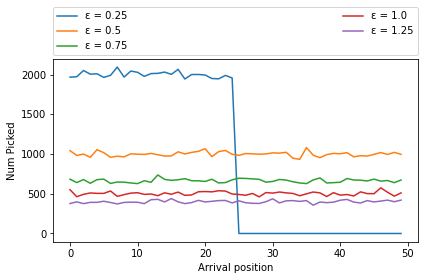

   epsilon  None rate  Mean value (None=0)  Mean value (excluding None)
0     0.25    0.00000             0.923982                     0.923982
1     0.50    0.00000             0.954855                     0.954855
2     0.75    0.33594             0.656804                     0.989073
3     1.00    0.49656             0.499978                     0.993122
4     1.25    0.60026             0.397701                     0.994899
FairGeneralProphet binomial


100%|█████████████████████████████████████| 50000/50000 [33:48<00:00, 24.65it/s]
[0203/012956.542697:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0203/012956.545026:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[0203/012956.546086:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0203/012956.614554:WARNING:dns_config_service_posix.cc(205)] Failed to read DnsConfig.
[0203/012956.763865:WARNING:dns_config_service_posix.cc(205)] Failed to read DnsConfig.
[0203/012957.352703:INFO:headless_shell.cc(653)] Written to file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/tmpn3w2vzem/temp.png.


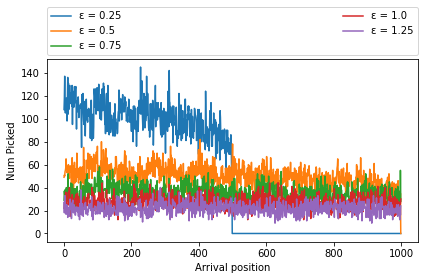

   epsilon  None rate  Mean value (None=0)  Mean value (excluding None)
0     0.25    0.00126                544.0                        545.0
1     0.50    0.00044                548.0                        548.0
2     0.75    0.29276                390.0                        552.0
3     1.00    0.45970                299.0                        554.0
4     1.25    0.56528                241.0                        555.0
FairIIDProphet uniform


100%|██████████████████████████████████| 50000/50000 [00:03<00:00, 14856.60it/s]
[0203/013013.817298:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0203/013013.819884:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[0203/013013.820389:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0203/013013.880517:WARNING:dns_config_service_posix.cc(205)] Failed to read DnsConfig.
[0203/013014.004433:WARNING:dns_config_service_posix.cc(205)] Failed to read DnsConfig.
[0203/013014.580569:INFO:headless_shell.cc(653)] Written to file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/tmp255rc83b/temp.png.


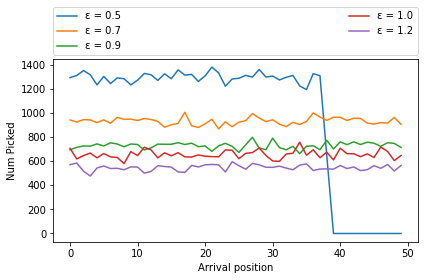

   epsilon  None rate  Mean value (None=0)  Mean value (excluding None)
0      0.5    0.00000             0.946370                     0.946370
1      0.7    0.06548             0.910178                     0.973952
2      0.9    0.26886             0.721653                     0.987025
3      1.0    0.34236             0.650663                     0.989390
4      1.2    0.45242             0.543271                     0.992132
FairIIDProphet binomial


  2%|▌                                      | 762/50000 [00:14<17:22, 47.25it/s]/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
100%|███████████████████████████████████| 50000/50000 [1:44:20<00:00,  7.99it/s]
[0203/120148.879751:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0203/120148.884347:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[0203/120148.885577:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/: Operation not permitted (1)
[0203/120149.825680:INFO:headless_shell.cc(653)] Written to file /var/folders/t9/mpvzds097dg0rgn1txtmvf180000gn/T/tmpcgx75p_w/temp.png.


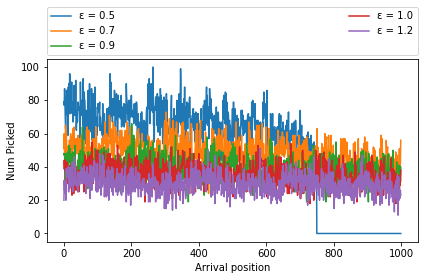

   epsilon  None rate  Mean value (None=0)  Mean value (excluding None)
0      0.5    0.00084                546.0                        547.0
1      0.7    0.03614                529.0                        549.0
2      0.9    0.22536                427.0                        551.0
3      1.0    0.29290                390.0                        552.0
4      1.2    0.40610                328.0                        553.0


In [37]:
# Creating directory to save to
date_time = datetime.now().strftime("%d_%m_%H.%M")
path = os.path.join('images','extension',date_time)
if not os.path.exists(path):
    os.makedirs(path)

# Fair general prophet Uniform distribution
parameters_general_prophet = np.arange(0.25, 1.5, .25)
N_experiment_reps = 50000

grid_search(algorithm='FairGeneralProphet',
            N_experimentReps = N_experiment_reps,
            distribution_type = 'uniform',
            n_candidates = 50,
            parameters = parameters_general_prophet,
            path = path)

# Fair general prophet Binomial distribution
grid_search(algorithm='FairGeneralProphet',
            N_experimentReps = N_experiment_reps,
            distribution_type = 'binomial',
            n_candidates = 1000,
            parameters = parameters_general_prophet,
            path = path)


# Fair IID prophet Uniform distribution
parameters_fair_iid = np.arange(0.5, 1.3, 0.10)

grid_search(algorithm='FairIIDProphet',
            N_experimentReps = N_experiment_reps,
            distribution_type = 'uniform',
            n_candidates = 50,
            parameters = parameters_fair_iid,
            path=path)

# Fair IID prophet Binomial distribution
grid_search(algorithm='FairIIDProphet',
            N_experimentReps = N_experiment_reps,
            distribution_type = 'binomial',
            n_candidates = 1000,
            parameters = parameters_fair_iid,
            path=path)

## Running the significance test for the extension, uniform distribution

_Output is two lists of 10x the avgInclude for the two groups. Group 1 is PaperValue, Group 2 is ourExtensionValue, for both FairProphet and FairIID._

In [ ]:
FairProphetPA_PaperValue, FairProphetPA_ExtensionValue = [], []
FairProphetIID_PaperValue, FairProphetIID_ExtensionValue = [], []

FairProphetPA_PaperValue_exclude, FairProphetPA_ExtensionValue_exclude = [], []
FairProphetIID_PaperValue_exclude, FairProphetIID_ExtensionValue_exclude = [], []

FairProphetPA_PaperParameter = 1
FairProphetIID_PaperParameter = 1
FairProphetPA_ExtensionParameter = .5
FairProphetIID_ExtensionParameter = .7

for i in range(0, 10):
    _, avg_include, avg_exclude, _ = runExperimentExtended(algorithm="FairGeneralProphet", 
                                                                                     N_experimentReps=50000,
                                                                                     distribution_type="uniform", 
                                                                                     n_candidates=50, 
                                                                                     epsilon=FairProphetPA_PaperParameter
                                                                                    )
    FairProphetPA_PaperValue.append(avg_include)
    FairProphetPA_PaperValue_exclude.append(avg_exclude)
    
    _, avg_include, avg_exclude, _ = runExperimentExtended(algorithm="FairGeneralProphet", 
                                                                                     N_experimentReps=50000,
                                                                                     distribution_type="uniform", 
                                                                                     n_candidates=50, 
                                                                                     epsilon=FairProphetPA_ExtensionParameter
                                                                                    )
    FairProphetPA_ExtensionValue.append(avg_include)
    FairProphetPA_ExtensionValue_exclude.append(avg_exclude)
    
    
for i in range(0, 10):
    _, avg_include, avg_exclude, _ = runExperimentExtended(algorithm="FairIIDProphet", 
                                                                                     N_experimentReps=50000,
                                                                                     distribution_type="uniform", 
                                                                                     n_candidates=50, 
                                                                                     epsilon=FairProphetIID_PaperParameter
                                                                                    )
    FairProphetIID_PaperValue.append(avg_include)
    FairProphetIID_PaperValue_exclude.append(avg_exclude)
    
    _, avg_include, avg_exclude, _ = runExperimentExtended(algorithm="FairIIDProphet", 
                                                                                     N_experimentReps=50000,
                                                                                     distribution_type="uniform", 
                                                                                     n_candidates=50, 
                                                                                     epsilon=FairProphetIID_ExtensionParameter
                                                                                    )
    FairProphetIID_ExtensionValue.append(avg_include)
    FairProphetIID_ExtensionValue_exclude.append(avg_exclude)
    
    
# FairProphetPA_PaperValue, FairProphetPA_ExtensionValue = [], []
# FairProphetIID_PaperValue, FairProphetIID_ExtensionValue = [], []

# FairProphetPA_PaperValue_exclude, FairProphetPA_ExtensionValue_exclude = [], []
# FairProphetIID_PaperValue_exclude, FairProphetIID_ExtensionValue_exclude = [], []


In [ ]:
print(ttest_ind(FairProphetPA_PaperValue, FairProphetPA_ExtensionValue))
print(ttest_ind(FairProphetIID_PaperValue, FairProphetIID_ExtensionValue))

In [ ]:
print(ttest_ind(FairProphetPA_PaperValue_exclude, FairProphetPA_ExtensionValue_exclude))
print(ttest_ind(FairProphetIID_PaperValue_exclude, FairProphetIID_ExtensionValue_exclude))